<a href="https://colab.research.google.com/github/Rahulroy5/Machine-Learning/blob/main/Stockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#imported important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [4]:
 #Downloaded historical stock price data for google(GOOG)
 start = '2013-01-01'
 end = '2023-12-30'

 stock = 'GOOG'
 data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
# resetting the index , instead of date using 0,1,2,....
data.reset_index(inplace=True)

In [6]:
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,17.993254,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.003704,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.359463,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.279356,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.243282,67295297
...,...,...,...,...,...,...,...
2763,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.557770,18494700
2764,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.657669,11170100
2765,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.279236,17288400
2766,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.119415,12192500


In [7]:
#moving average of 100 days data
ma_100_days = data.Close.rolling(100).mean()

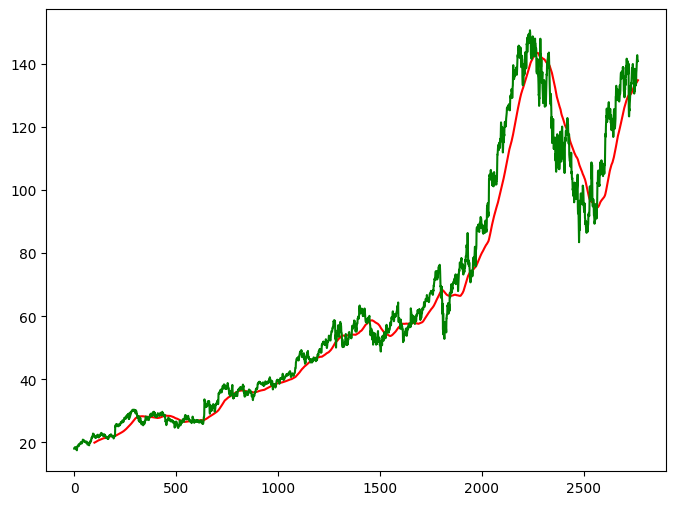

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()

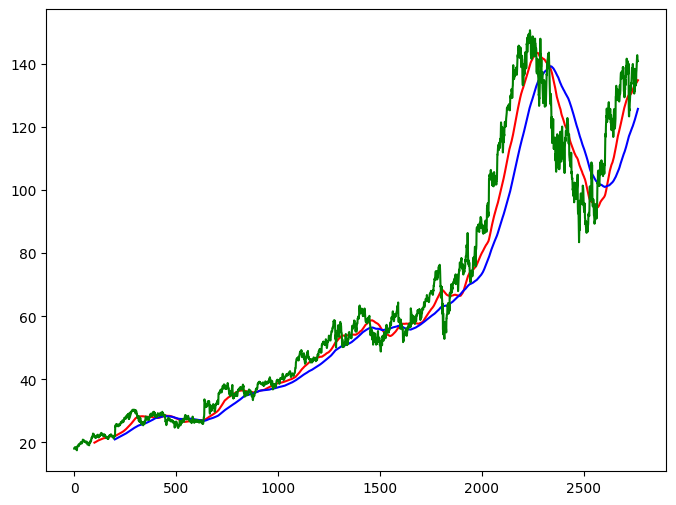

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
# to remove null values from data
data.dropna(inplace=True)

In [12]:
#distributing total data as 80% traing data and 20% test data.
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [13]:
# Number of rows of training data set
data_train.shape[0]

2214

In [14]:
data_test.shape[0]

554

In [15]:
# for scaling the data using MinMaxscaler to fix the data between 0s and 1s.
#importing library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
# predicting the value of day 101 using the data of 0-100 days.
#creating two arrays
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i, 0])

x, y = np.array(x), np.array(y)  #converting two input dataset into numpy arrays.


In [20]:
# keras layer works as independent layer , all these layers are placed in sequential manner,output of one layer become input of second layer
from keras.layers import Dense, Dropout, LSTM # creating layers for Dense, Dropout, LSTM
from keras.models import Sequential # a neural network which is use to predict the data base upon the time series

In [27]:
#creating model with the sequential
model = Sequential()
#creating the neural for each and every model
#creating 4 LSTM layers for the sequential each layer is having diffirent numbers of neurals
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
          input_shape = ((x.shape[1],1)))) # 50 neurals
model.add(Dropout(0.2))
# relu is one kind of neural network parameter which is passed to calculate RNN network.
#return_sequences = True --> means output of one layer become input of next.
# 20% of the data instead of the actual value it will feed the mean value, so that the graph will not overfitted(if we only go with training data set)

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True)),
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True)),
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu')),
model.add(Dropout(0.4))

model.add(Dense(units= 1)) # predict only one value thats the closing price of the stocks.

In [28]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [29]:
model.fit(x,y, epochs= 50 ,batch_size = 32, verbose =1) # epochs= 50 means 50 times our data will be pushed from start to end everytime
# batch_size = 32 means every time 32 rows of data will be taken
# verbose = 1 means printing of the data

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 34s 366ms/step - loss: 0.0540
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 39s 341ms/step - loss: 0.0035
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 334ms/step - loss: 0.0029
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 328ms/step - loss: 0.0027
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 322ms/step - loss: 0.0030
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0027
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - loss: 0.0036
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 23s 322ms/step - loss: 0.0028
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0021
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 292ms/step - loss: 0.0030
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 322ms/step - loss: 0.0019
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 315ms/step - loss: 0.0020
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 293ms/step - loss: 0.0021
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 320ms/step - loss: 0.0024
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

Using 100 days of training data predicting 101 day training data or 1 row of test data.

In [33]:
past_100_days = data_train.tail(100)

In [34]:
data_test = pd.concat([past_100_days, data_test], ignore_index= True)

In [57]:
data_test  # now the total numbers of rows become 654 from 554 because we added last 100days data.

,Close
0,121.676498
1,120.125504
2,120.578003
3,121.490501
4,121.064003
...,...
649,142.720001
650,142.820007
651,141.440002
652,141.279999


In [58]:
data_test_scale = scaler.fit_transform(data_test)

In [59]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i, 0])

x, y = np.array(x), np.array(y)

In [60]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step


In [61]:
y_predict #values are fitted between 0 and 1

array([[0.85123783],
       [0.8543076 ],
       [0.85877764],
       [0.8642975 ],
       [0.8704443 ],
       [0.8762168 ],
       [0.88082373],
       [0.88400114],
       [0.8865857 ],
       [0.88942087],
       [0.89321285],
       [0.89779776],
       [0.9030029 ],
       [0.9087386 ],
       [0.91504323],
       [0.9219283 ],
       [0.9292966 ],
       [0.93692887],
       [0.9442269 ],
       [0.95067596],
       [0.9563393 ],
       [0.96140397],
       [0.96597123],
       [0.97008884],
       [0.973956  ],
       [0.97766036],
       [0.9808737 ],
       [0.98324585],
       [0.9846146 ],
       [0.9845947 ],
       [0.98327625],
       [0.98066556],
       [0.97670734],
       [0.97174656],
       [0.9661429 ],
       [0.9603549 ],
       [0.95522285],
       [0.951493  ],
       [0.94950175],
       [0.9492963 ],
       [0.9504821 ],
       [0.95232457],
       [0.9544661 ],
       [0.95644796],
       [0.9576696 ],
       [0.957725  ],
       [0.9566976 ],
       [0.955

In [62]:
# converting y_predict into original price
scaler.scale_

array([0.01487675])

In [63]:
scale = 1/scaler.scale_

In [64]:
y_predict = y_predict * scale # predicted value

In [65]:
y = y * scale # actual value

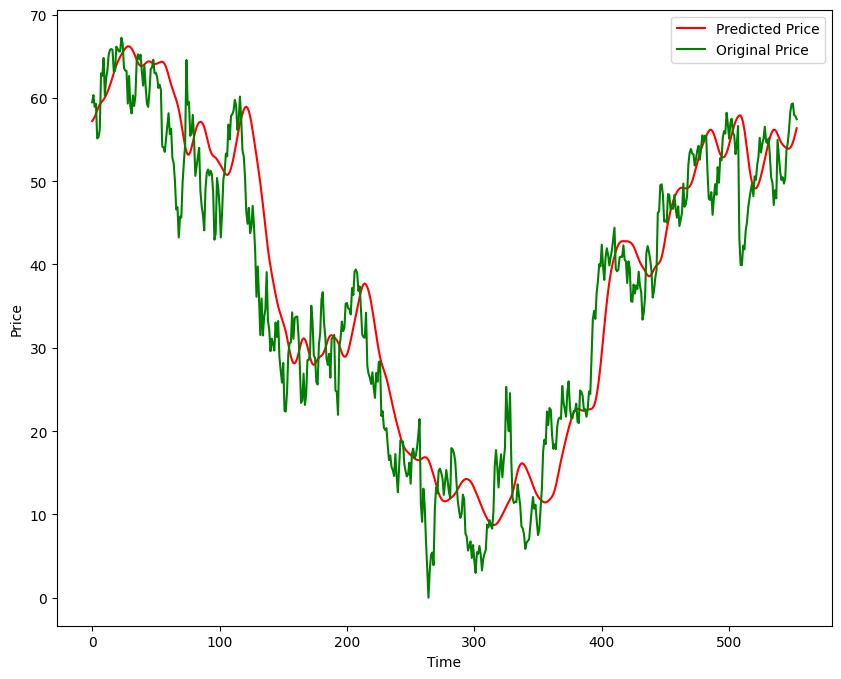

In [67]:
plt.figure(figsize= (10,8))
plt.plot(y_predict,'r', label = 'Predicted Price')
plt.plot(y, 'g' , label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [68]:
model.save('Stock predictions Model.keras')